In [ ]:
#To run on the web
import os
import sys

# Check if running in Colab
if 'google.colab' in sys.modules:
    !git clone https://github.com/EvanGerns/ode_solvers.git
    sys.path.append('/content/ode_solvers')
else:
    # Check if we are inside the 'notebooks' folder and move up one level
    if os.path.basename(os.getcwd()) == 'notebooks':
        sys.path.append(os.path.abspath(".."))
    else:
        sys.path.append(os.getcwd())

'try:\n    import google.colab\n    !git clone https://github.com/YOUR_USERNAME/YOUR_REPO_NAME.git\n    import sys\n    sys.path.append(\'/content/YOUR_REPO_NAME\')\n    print("Running in Colab: Project cloned.")s\nexcept:\n    print("Running locally.")'

In [ ]:
from src.solvers import euler, rk2, rk4
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [175]:
def f_test(t, x):
    return 5*np.sin(t) + 0.2*x - 0.1*t**2
    #Arbitrary nontrivial equation with a solution that is not monotonic but doesn't grow unreasonably fast

x0_test = 1.0   #Arbitrary
interval_test = (0, 10) #Arbitrary
length_tests = [10, 20, 100, 1000]
t_tests = [np.linspace(interval_test[0], interval_test[1], length_tests[i]) for i in range(len(length_tests))]
t_scipy = np.linspace(interval_test[0], interval_test[1], 10000)    #More subdivisions than any of the (current) tests
scipy_sol = solve_ivp(f_test, interval_test, [x0_test], t_eval=t_scipy).y[0]
#scipy_sol_interp = [np.interp(t_tests[i], t_scipy, scipy_sol) for i in range(len(t_tests))]
rms_errors = [[], [], []]

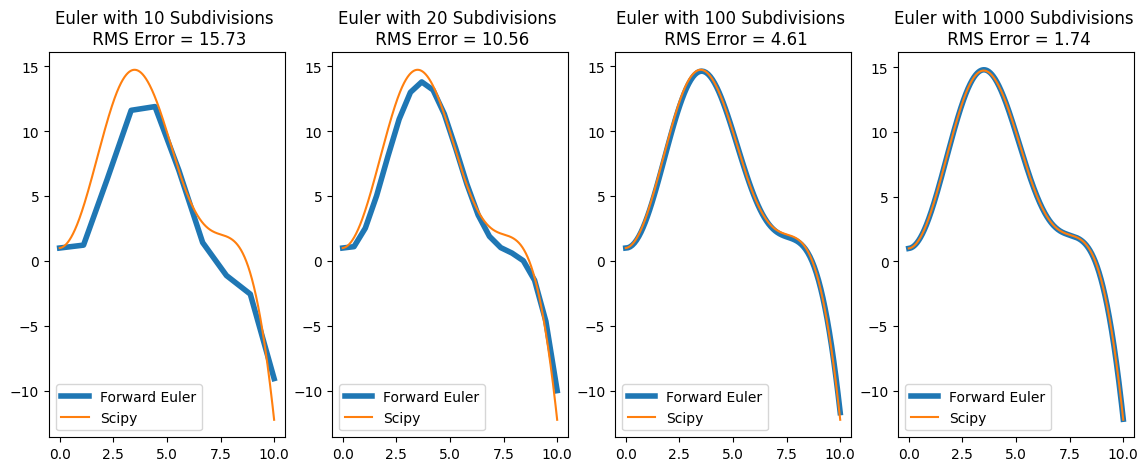

In [176]:
euler_sol = [euler(f_test, x0_test, t_tests[i]) for i in range(len(t_tests))]
euler_sol_interp = [np.interp(t_scipy, t_tests[i], euler_sol[i]) for i in range(len(t_tests))]
rms_errors[0] = [np.sqrt(np.mean(np.linalg.norm((np.array(euler_sol_interp[i])-np.array(scipy_sol))))) for i in range(len(t_tests))]
fig, ax = plt.subplots(nrows=1, ncols=len(t_tests), figsize=(14,5))
for i in range(len(t_tests)):
    ax[i].plot(t_tests[i], euler_sol[i], label="Forward Euler", linewidth=4)
    ax[i].plot(t_scipy, scipy_sol, label="Scipy")
    ax[i].set_title(f"Euler with {len(t_tests[i])} Subdivisions \n RMS Error = %.2f" % rms_errors[0][i])
    ax[i].legend()
plt.show()

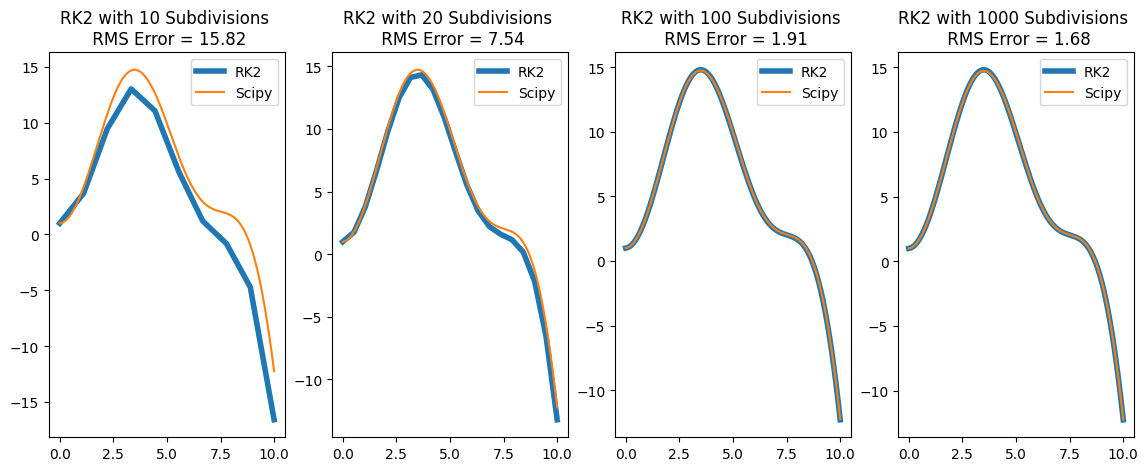

In [177]:
rk2_sol = [rk2(f_test, x0_test, t_tests[i]) for i in range(len(t_tests))]
rk2_sol_interp = [np.interp(t_scipy, t_tests[i], rk2_sol[i]) for i in range(len(t_tests))]
rms_errors[1] = [np.sqrt(np.mean(np.linalg.norm((np.array(rk2_sol_interp[i])-np.array(scipy_sol))))) for i in range(len(t_tests))]
fig, ax = plt.subplots(nrows=1, ncols=len(t_tests), figsize=(14,5))
for i in range(len(t_tests)):
    ax[i].plot(t_tests[i], rk2_sol[i], label="RK2", linewidth=4)
    ax[i].plot(t_scipy, scipy_sol, label="Scipy")
    ax[i].set_title(f"RK2 with {len(t_tests[i])} Subdivisions \n RMS Error = %.2f" % rms_errors[1][i])
    ax[i].legend()
plt.show()

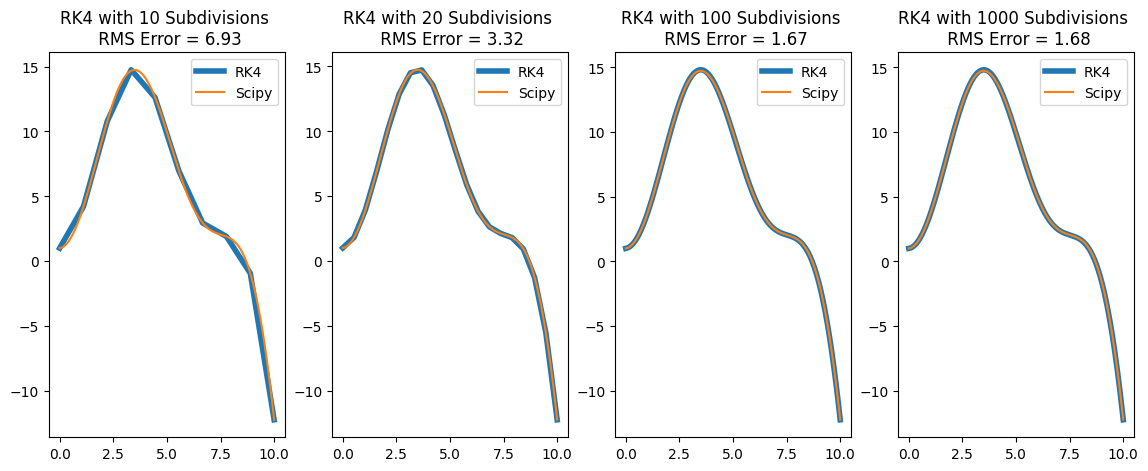

In [178]:
rk4_sol = [rk4(f_test, x0_test, t_tests[i]) for i in range(len(t_tests))]
rk4_sol_interp = [np.interp(t_scipy, t_tests[i], rk4_sol[i]) for i in range(len(t_tests))]
rms_errors[2] = [np.sqrt(np.mean(np.linalg.norm((np.array(rk4_sol_interp[i])-np.array(scipy_sol))))) for i in range(len(t_tests))]
fig, ax = plt.subplots(nrows=1, ncols=len(t_tests), figsize=(14,5))
for i in range(len(t_tests)):
    ax[i].plot(t_tests[i], rk4_sol[i], label="RK4", linewidth=4)
    ax[i].plot(t_scipy, scipy_sol, label="Scipy")
    ax[i].set_title(f"RK4 with {len(t_tests[i])} Subdivisions \n RMS Error = %.2f" % rms_errors[2][i])
    ax[i].legend()
plt.show()

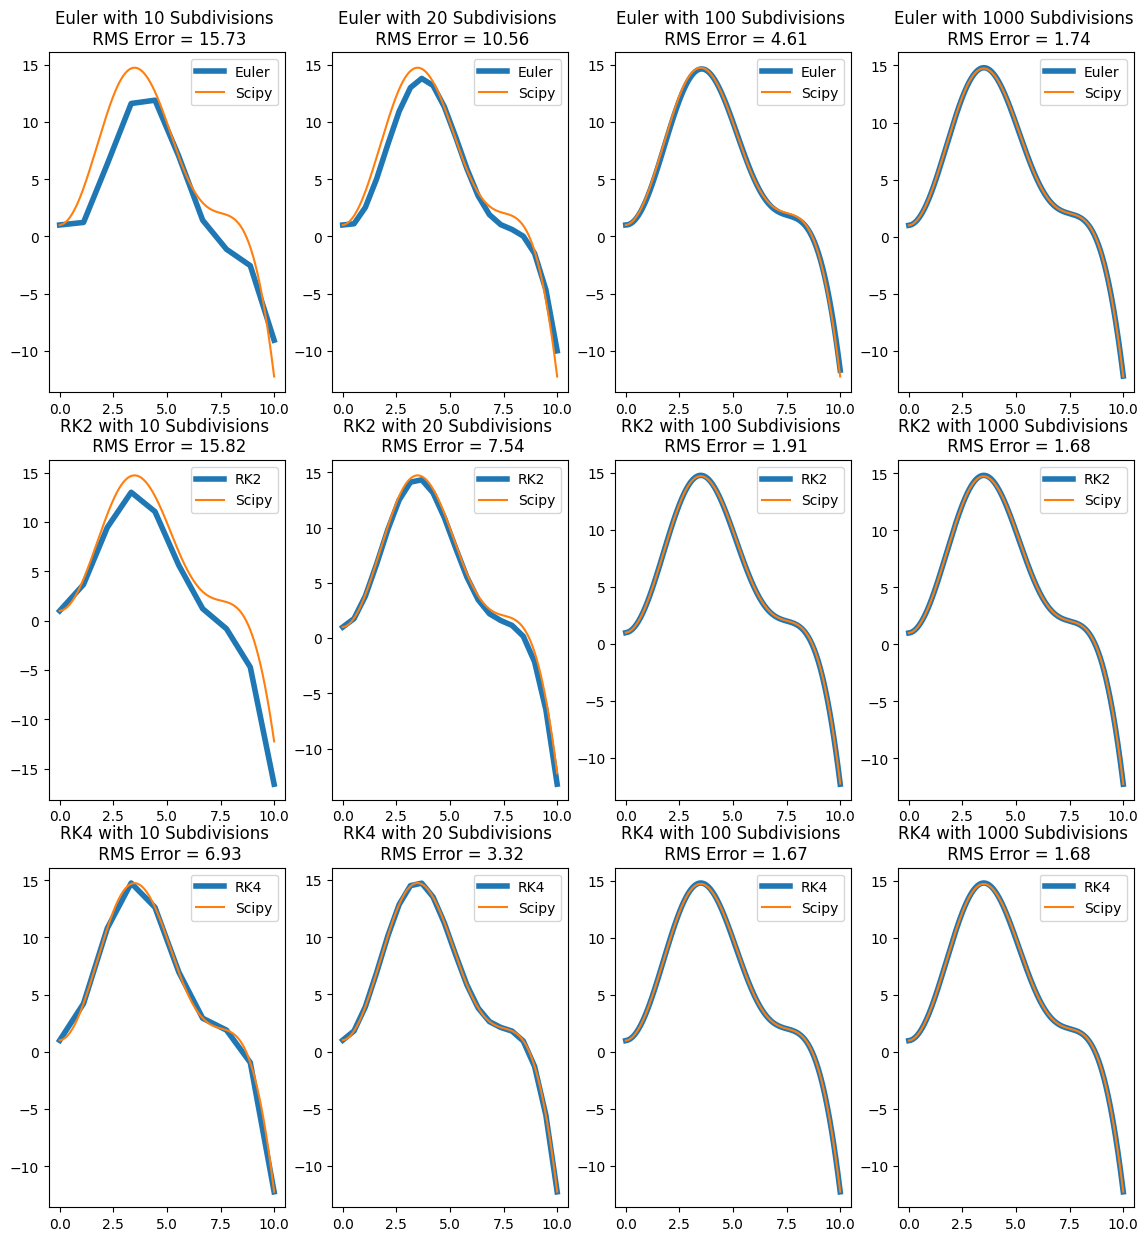

In [179]:
fig, ax = plt.subplots(nrows=3, ncols=len(t_tests), figsize=(14,15))
for i in range(len(t_tests)):
    #Euler
    ax[0][i].plot(t_tests[i], euler_sol[i], label="Euler", linewidth=4)
    ax[0][i].plot(t_scipy, scipy_sol, label="Scipy")
    ax[0][i].set_title(f"Euler with {len(t_tests[i])} Subdivisions \n RMS Error = %.2f" % rms_errors[0][i])
    ax[0][i].legend()

for i in range(len(t_tests)):
    #RK2
    ax[1][i].plot(t_tests[i], rk2_sol[i], label="RK2", linewidth=4)
    ax[1][i].plot(t_scipy, scipy_sol, label="Scipy")
    ax[1][i].set_title(f"RK2 with {len(t_tests[i])} Subdivisions \n RMS Error = %.2f" % rms_errors[1][i])
    ax[1][i].legend()
    
for i in range(len(t_tests)):
    #RK4
    ax[2][i].plot(t_tests[i], rk4_sol[i], label="RK4", linewidth=4)
    ax[2][i].plot(t_scipy, scipy_sol, label="Scipy")
    ax[2][i].set_title(f"RK4 with {len(t_tests[i])} Subdivisions \n RMS Error = %.2f" % rms_errors[2][i])
    ax[2][i].legend()

plt.show()